In [1]:
import os
import json
import pandas as pd
import os
import numpy as np # type: ignore
from datetime import datetime

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

os.getcwd()
os.chdir(path="/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI")

In [2]:
# Libreriras para modelado y AUTOML
# ==============================================================================
from pycaret.datasets import get_data
from pycaret.classification import *
#from pycaret.utils import check_metric
from imblearn.over_sampling import *
import os

In [3]:
# You can safely assume that `build_dataset` is correctly implemented
def build_dataset():
    data = [json.loads(x) for x in open("data/Inputs/MLA_100k_checked_v3.jsonlines")]
    target = lambda x: x.get("condition")
    N = -10000
    X_train = data[:N]
    X_test = data[N:]
    y_train = [target(x) for x in X_train]
    y_test = [target(x) for x in X_test]
    for x in X_test:
        del x["condition"]
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
    print("Loading dataset...")
    # Train and test data following sklearn naming conventions
    # X_train (X_test too) is a list of dicts with information about each item.
    # y_train (y_test too) contains the labels to be predicted (new or used).
    # The label of X_train[i] is y_train[i].
    # The label of X_test[i] is y_test[i].
    X_train, y_train, X_test, y_test = build_dataset()

Loading dataset...


In [4]:
# Convert to DataFrame
df_train = pd.DataFrame(X_train)
df_train['condition'] = y_train

df_test = pd.DataFrame(X_test)
df_test['condition'] = y_test

# Display the first few rows of the DataFrames
print("Training DataFrame head:")
print(df_train.head())

print("\nTesting DataFrame head:")
print(df_test.head())

Training DataFrame head:
                                      seller_address            warranty  \
0  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
1  {'country': {'name': 'Argentina', 'id': 'AR'},...  NUESTRA REPUTACION   
2  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
3  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
4  {'country': {'name': 'Argentina', 'id': 'AR'},...      MI REPUTACION.   

  sub_status condition deal_ids  base_price  \
0         []       new       []        80.0   
1         []      used       []      2650.0   
2         []      used       []        60.0   
3         []       new       []       580.0   
4         []      used       []        30.0   

                                            shipping  \
0  {'local_pick_up': True, 'methods': [], 'tags':...   
1  {'local_pick_up': True, 'methods': [], 'tags':...   
2  {'local_pick_up': True, 'methods': [], 'tags':...   
3  {'local_

In [5]:
df_train.head()


,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6553902747,[],MLA126406,[{'id': 'MLA4695330653-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,None,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,[],,MLA7727150374,[],MLA10267,[{'id': 'MLA7160447179-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,None,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6561247998,[],MLA1227,[{'id': 'MLA7367189936-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,None,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,[{'id': 'MLA9191625553-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,None,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],,MLA3133256685,[],MLA41287,[{'id': 'MLA7787961817-902981678'}],2015-08-28T13:37:41.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7787961817,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co

In [6]:
os.getcwd()

'/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI'

In [7]:
import pandas as pd

# Read the Parquet files back into DataFrames
df_eda= pd.read_parquet("data/Outputs/df_eda.parquet")

# Display the first few rows of the loaded DataFrames
print("Loaded Training DataFrame head:")
(df_eda.head())

Loaded Training DataFrame head:


,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,category_id,last_updated,international_delivery_mode,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,title,automatic_relist,date_created,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,country_name,country_id,state_name,state_id,city_name,city_id,local_pick_up,free_shipping,mode,dimensions,descrip_mdo_0,id_mdo_0,type_mdo_0,id_p0,target
0,None,new,80.0,8208882349,MLA,bronze,80.0,buy_it_now,MLA6553902747,MLA126406,2015-09-05T20:42:58.000Z,none,MLA4695330653,NaN,NaN,True,NaN,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,Argentina,AR,Capital Federal,AR-C,San Cristóbal,TUxBQlNBTjkwNTZa,True,False,not_specified,None,Transferencia bancaria,MLATB,G,5386-MLA4695330653_052013,1
1,NUESTRA REPUTACION,used,2650.0,8141699488,MLA,silver,2650.0,buy_it_now,MLA7727150374,MLA10267,2015-09-26T18:08:34.000Z,none,MLA7160447179,NaN,NaN,True,NaN,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,Argentina,AR,Capital Federal,AR-C,Buenos Aires,,True,False,me2,None,Transferencia bancaria,MLATB,G,23223-MLA7160447179_022015,0
2,None,used,60.0,8386096505,MLA,bronze,60.0,buy_it_now,MLA6561247998,MLA1227,2015-09-09T23:57:10.000Z,none,MLA7367189936,NaN,NaN,True,NaN,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,Argentina,AR,Capital Federal,AR-C,Boedo,TUxBQkJPRTQ0OTRa,True,False,me2,None,Transferencia bancaria,MLATB,G,22076-MLA7367189936_012015,0
3,None,new,580.0,5377752182,MLA,silver,580.0,buy_it_now,None,MLA86345,2015-10-05T16:03:50.306Z,none,MLA9191625553,NaN,NaN,True,NaN,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,2015-12-04 01:13:16,active,None,NaN,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,Argentina,AR,Capital Federal,AR-C,Floresta,TUxBQkZMTzg5MjFa,True,False,me2,None,Transferencia bancaria,MLATB,G,183901-MLA9191625553_092015,1
4,MI REPUTACION.,used,30.0,2938071313,MLA,bronze,30.0,buy_it_now,MLA3133256685,MLA41287,2015-08-28T13:37:41.000Z,none,MLA7787961817,NaN,NaN,True,NaN,ARS,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,2015-10-23 22:07:20,active,None,NaN,NaN,1,2015-08-24 22:07:20,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,Argentina,AR,Buenos Aires,AR-B,Tres de febrero,TUxBQ1RSRTMxODE5NA,True,False,not_specified,None,Transferencia bancaria,MLATB,G,13595-MLA7787961817_1713,0


In [8]:
df_eda['target'].value_counts(normalize=True)

target
1    0.53758
0    0.46242
Name: proportion, dtype: float64

In [9]:
df_eda.dtypes

warranty                               object
condition                              object
base_price                            float64
seller_id                               int64
site_id                                object
listing_type_id                        object
price                                 float64
buying_mode                            object
parent_item_id                         object
category_id                            object
last_updated                           object
international_delivery_mode            object
id                                     object
official_store_id                     float64
differential_pricing                  float64
accepts_mercadopago                      bool
original_price                        float64
currency_id                            object
title                                  object
automatic_relist                         bool
date_created                           object
stop_time                      dat

In [10]:
# Select only the numeric columns
df_eda_numeric = df_eda.select_dtypes(include=[np.number])

# Calculate the covariance matrix
cova_mtrx = df_eda_numeric.cov()

# Find the indices where covariance is zero
high_cov = np.where(cova_mtrx == 0)

# Filter out the positions where x == y (diagonal elements)
high_cov = [(cova_mtrx.index[x], cova_mtrx.columns[y]) for x, y in zip(*high_cov) if x != y]

# Display the results
print(high_cov)

[('original_price', 'target'), ('target', 'original_price')]


In [11]:
df_eda_numeric.head()

,base_price,seller_id,price,official_store_id,differential_pricing,original_price,catalog_product_id,subtitle,initial_quantity,sold_quantity,available_quantity,target
0,80.0,8208882349,80.0,NaN,NaN,NaN,NaN,NaN,1,0,1,1
1,2650.0,8141699488,2650.0,NaN,NaN,NaN,NaN,NaN,1,0,1,0
2,60.0,8386096505,60.0,NaN,NaN,NaN,NaN,NaN,1,0,1,0
3,580.0,5377752182,580.0,NaN,NaN,NaN,NaN,NaN,1,0,1,1
4,30.0,2938071313,30.0,NaN,NaN,NaN,NaN,NaN,1,0,1,0


In [12]:
# Assuming data_final is your DataFrame and high_corr_var is your list of correlated variables
corr_matrix = df_eda_numeric.corr().abs()
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
high_corr_var

[('base_price', 'price'),
 ('base_price', 'original_price'),
 ('price', 'original_price'),
 ('initial_quantity', 'available_quantity')]

In [13]:
# Create a set to store columns to be removed
columns_to_remove = set()

for pair in high_corr_var:
    var_1 = df_eda_numeric[pair[0]].var()
    var_2 = df_eda_numeric[pair[1]].var()

    if not pd.isna(var_1) and not pd.isna(var_2):
        diff_var = var_1 - var_2
        if diff_var > 1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[0], 'varianza:', f'{var_1:.1f}', '| Elimina:', pair[1], 'varianza:', f'{var_2:.1f}')
            columns_to_remove.add(pair[1])
        elif diff_var < -1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[1], 'varianza:', f'{var_2:.1f}', '| Elimina:', pair[0], 'varianza:', f'{var_1:.1f}')
            columns_to_remove.add(pair[0])

# Remove the columns outside the loop
df_eda_numeric.drop(columns=columns_to_remove, inplace=True)

print(df_eda_numeric.shape)

Queda base_price varianza: 74358322067678.9 | Elimina: price varianza: 74358322057680.5
Queda base_price varianza: 74358322067678.9 | Elimina: original_price varianza: 5043609.0
Queda price varianza: 74358322057680.5 | Elimina: original_price varianza: 5043609.0
Queda initial_quantity varianza: 177305.2 | Elimina: available_quantity varianza: 177079.7
(100000, 9)


In [14]:
dataset_00 = pd.concat([df_eda.select_dtypes(exclude=[np.number]), df_eda_numeric], axis=1)

In [15]:
# Remove duplicates from the DataFrame based on the 'id_peticion' column
dataset_01 = dataset_00.drop_duplicates(subset=['id'])

In [16]:
dataset_01.shape

(100000, 43)

In [17]:
# Step 1: Clean the warranty column
def clean_warranty(warranty):
    if pd.isnull(warranty):
        return 'missing'
    # Normalize different variations of the same term
    warranty = warranty.lower()
    if 'mes' in warranty:
        if '3' in warranty:
            return '3 meses'
        elif '6' in warranty:
            return '6 meses'
        elif '12' in warranty or '1 año' in warranty:
            return '12 meses'
        else:
            return 'otros'
    elif 'año' in warranty:
        return '12 meses'
    elif 'si' in warranty:
        return 'sí'
    elif 'sin garantía' in warranty:
        return 'sin garantía'
    elif 'missing' in warranty:
        return 'missing'
    else:
        return 'otros'

# Step 1: Define a function to extract the first two words
def extract_first_two_words(title):
    if pd.isnull(title) or title == '':
        return ''
    words = title.split()
    return ' '.join(words[:2])

    # Step 1: Define a function to extract the first word
def extract_first_word(title):
    if pd.isnull(title) or title == '':
        return ''
    return title.split()[0]


In [18]:
dataset_01['warranty_cleaned'] = dataset_01['warranty'].apply(clean_warranty)

In [19]:
# Step 2: Apply this function to the 'title' column to create a new column 'first_two_words'
dataset_01['first_two_words_title'] = dataset_01['title'].apply(extract_first_two_words)
dataset_01['first_word_title'] = dataset_01['title'].apply(extract_first_word)

In [20]:
dataset_01.head(2)

,warranty,condition,site_id,listing_type_id,buying_mode,parent_item_id,category_id,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,video_id,start_time,permalink,country_name,country_id,state_name,state_id,city_name,city_id,local_pick_up,free_shipping,mode,dimensions,descrip_mdo_0,id_mdo_0,type_mdo_0,id_p0,base_price,seller_id,official_store_id,differential_pricing,catalog_product_id,subtitle,initial_quantity,sold_quantity,target,warranty_cleaned,first_two_words_title,first_word_title
0,None,new,MLA,bronze,buy_it_now,MLA6553902747,MLA126406,2015-09-05T20:42:58.000Z,none,MLA4695330653,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,2015-11-04 20:42:53,active,None,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,Argentina,AR,Capital Federal,AR-C,San Cristóbal,TUxBQlNBTjkwNTZa,True,False,not_specified,None,Transferencia bancaria,MLATB,G,5386-MLA4695330653_052013,80.0,8208882349,NaN,NaN,NaN,NaN,1,0,1,missing,Auriculares Samsung,Auriculares
1,NUESTRA REPUTACION,used,MLA,silver,buy_it_now,MLA7727150374,MLA10267,2015-09-26T18:08:34.000Z,none,MLA7160447179,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,2015-11-25 18:08:30,active,None,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,Argentina,AR,Capital Federal,AR-C,Buenos Aires,,True,False,me2,None,Transferencia bancaria,MLATB,G,23223-MLA7160447179_022015,2650.0,8141699488,NaN,NaN,NaN,NaN,1,0,0,otros,Cuchillo Daga,Cuchillo


In [21]:
dataset_02 = dataset_01.drop(columns=['permalink','warranty','condition','site_id','international_delivery_mode',
                                      'parent_item_id','last_updated','id','title','first_word_title','catalog_product_id','id_p0',
                                      'dimensions','mode','city_id','city_name'])

In [22]:
data = dataset_02.sample(frac=0.70, random_state=2024)
data_validacion = dataset_02.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_validacion.reset_index(inplace=True, drop=True)
print(data.shape)
print(data_validacion.shape)

(70000, 30)
(30000, 30)


In [23]:
col_categoricas = data.select_dtypes('object').columns
col_categoricas

Index(['listing_type_id', 'buying_mode', 'category_id', 'currency_id',
       'date_created', 'status', 'video_id', 'country_name', 'country_id',
       'state_name', 'state_id', 'descrip_mdo_0', 'id_mdo_0', 'type_mdo_0',
       'warranty_cleaned', 'first_two_words_title'],
      dtype='object')

In [24]:
col_numericas = data.columns.drop(col_categoricas)
col_numericas

Index(['accepts_mercadopago', 'automatic_relist', 'stop_time', 'start_time',
       'local_pick_up', 'free_shipping', 'base_price', 'seller_id',
       'official_store_id', 'differential_pricing', 'subtitle',
       'initial_quantity', 'sold_quantity', 'target'],
      dtype='object')

In [25]:
data.head()

,listing_type_id,buying_mode,category_id,accepts_mercadopago,currency_id,automatic_relist,date_created,stop_time,status,video_id,start_time,country_name,country_id,state_name,state_id,local_pick_up,free_shipping,descrip_mdo_0,id_mdo_0,type_mdo_0,base_price,seller_id,official_store_id,differential_pricing,subtitle,initial_quantity,sold_quantity,target,warranty_cleaned,first_two_words_title
0,bronze,buy_it_now,MLA29858,True,ARS,False,2015-09-11T20:19:42.000Z,2015-11-10 20:19:42,active,None,2015-09-11 20:19:42,Argentina,AR,Misiones,AR-N,True,False,Transferencia bancaria,MLATB,G,129.0,4081005987,NaN,NaN,NaN,1,0,1,otros,1899 A
1,bronze,buy_it_now,MLA64553,True,ARS,False,2015-08-18T18:43:38.000Z,2015-10-17 18:43:38,active,None,2015-08-18 18:43:38,Argentina,AR,Capital Federal,AR-C,True,False,Transferencia bancaria,MLATB,G,85.0,7060837357,NaN,NaN,NaN,4,0,1,missing,Camisas Corte
2,bronze,buy_it_now,MLA40507,True,ARS,False,2015-09-01T00:00:00.000Z,2015-10-31 00:00:00,active,None,2015-09-01 00:00:00,Argentina,AR,Capital Federal,AR-C,True,False,Transferencia bancaria,MLATB,G,48.0,4131433201,NaN,NaN,NaN,1,0,0,missing,Prince Otto
3,bronze,buy_it_now,MLA1227,True,ARS,False,2015-09-04T19:31:47.000Z,2015-11-03 19:31:47,active,None,2015-09-04 19:31:47,Argentina,AR,Capital Federal,AR-C,True,False,Efectivo,MLAMO,G,49.0,3780235347,NaN,NaN,NaN,1,0,1,missing,Victor Massuh.
4,free,buy_it_now,MLA2513,True,ARS,False,2015-08-22T13:45:46.000Z,2015-10-21 13:45:46,active,None,2015-08-22 13:45:46,Argentina,AR,Buenos Aires,AR-B,True,False,Transferencia bancaria,MLATB,G,4190.0,3182860241,NaN,NaN,NaN,1,0,0,missing,Alfombra Kalpakian


In [26]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()

model_setup = s.setup(
    data=data,
    target='target', 
    session_id=123,
    #normalize=True,
    #normalize_method='minmax',
    fix_imbalance=True,

    remove_outliers=True,
   # transformation=True,
    ignore_features=['category_id','date_created','stop_time','start_time',
    'state_name','seller_id','first_two_words_title'],
    feature_selection=True,
 #   ignore_low_variance=True,
#    feature_ratio=True,
    remove_multicollinearity=True
   # multicollinearity_threshold=0.6,
   # numeric_features=col_numericas
#    pca=True,
 #   silent=True
)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(70000, 30)"
4,Transformed data shape,"(70436, 5)"
5,Transformed train set shape,"(49436, 5)"
6,Transformed test set shape,"(21000, 5)"
7,Ignore features,7
8,Numeric features,6
9,Categorical features,12


In [27]:
# OOP API
best = s.compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7897,0.8573,0.7131,0.8728,0.7849,0.5832,0.5947,1.5340
lightgbm,Light Gradient Boosting Machine,0.7871,0.8643,0.7019,0.8779,0.7801,0.5786,0.5923,1.5440
et,Extra Trees Classifier,0.7860,0.8467,0.7022,0.8753,0.7793,0.5764,0.5896,1.4060
dt,Decision Tree Classifier,0.7823,0.8338,0.6912,0.8782,0.7736,0.5696,0.5848,1.1500
gbc,Gradient Boosting Classifier,0.7678,0.8575,0.6264,0.9152,0.7437,0.5447,0.5776,1.4160
knn,K Neighbors Classifier,0.7663,0.8272,0.7357,0.8124,0.7721,0.5334,0.5363,1.1900
ada,Ada Boost Classifier,0.7622,0.8470,0.6051,0.9278,0.7325,0.5349,0.5748,1.2840
lr,Logistic Regression,0.6778,0.8188,0.4637,0.8811,0.6074,0.3761,0.4325,1.3980
svm,SVM - Linear Kernel,0.5728,0.6171,0.7712,0.6716,0.6056,0.1116,0.1348,1.1480
ridge,Ridge Classifier,0.5699,0.8016,0.2306,0.8869,0.3656,0.1844,0.2815,1.1390


In [28]:
m1_tuneado = s.tune_model(best, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7606,0.8370,0.6238,0.9009,0.7372,0.5304,0.5607
1,0.7598,0.8463,0.6172,0.9064,0.7344,0.5291,0.5619
2,0.7712,0.8425,0.6263,0.9239,0.7466,0.5517,0.5865
3,0.7571,0.8379,0.6089,0.9099,0.7295,0.5244,0.5595
4,0.7690,0.8500,0.6259,0.9187,0.7446,0.5471,0.5809
5,0.7669,0.8505,0.6241,0.9159,0.7423,0.5431,0.5767
6,0.7629,0.8426,0.6089,0.9245,0.7342,0.5360,0.5744
7,0.7555,0.8360,0.6081,0.9067,0.7280,0.5211,0.5557
8,0.7649,0.8528,0.6176,0.9187,0.7387,0.5395,0.5748


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [30]:


# OOP API
s.evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

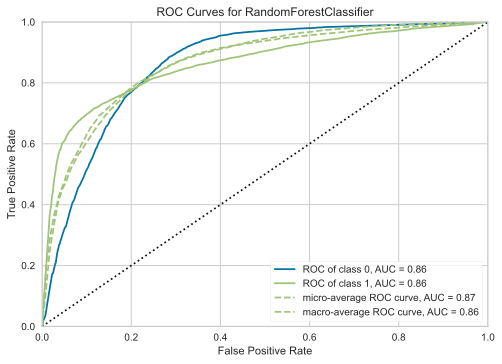

In [32]:
s.plot_model(best, plot='auc')

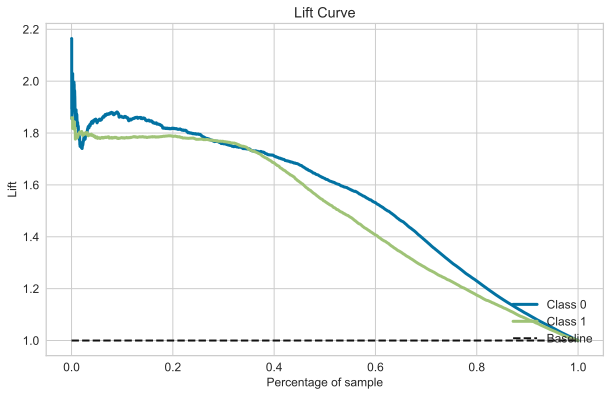

In [33]:
s.plot_model(best, plot="lift")

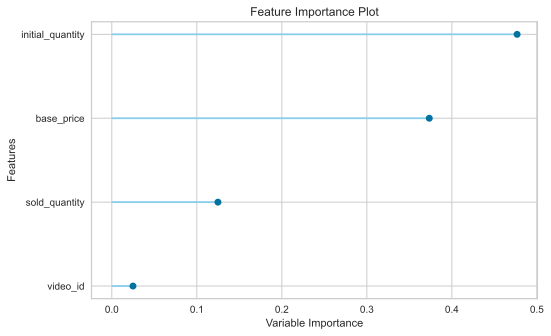

In [34]:
s.plot_model(best, plot="feature")

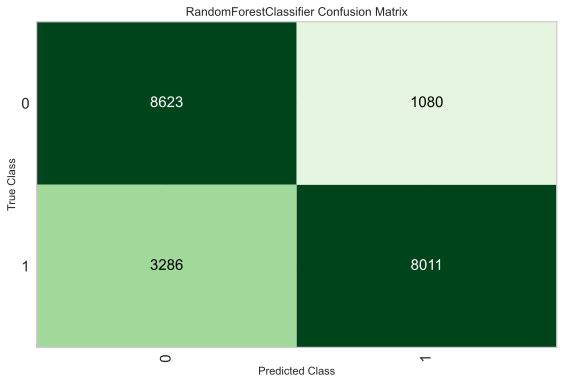

In [35]:
s.plot_model(best, plot="confusion_matrix")

In [36]:

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7921,0.8629,0.7091,0.8812,0.7859,0.5884,0.6015


,listing_type_id,buying_mode,accepts_mercadopago,currency_id,automatic_relist,status,video_id,country_name,country_id,state_id,...,base_price,official_store_id,differential_pricing,subtitle,initial_quantity,sold_quantity,warranty_cleaned,target,prediction_label,prediction_score
37856,free,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-C,...,70.00000,NaN,NaN,NaN,1,0,missing,0,0,0.8743
18569,bronze,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-B,...,50.00000,NaN,NaN,NaN,1,0,missing,1,0,0.9251
69810,bronze,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-C,...,99.00000,NaN,NaN,NaN,1,0,missing,0,0,0.7425
594,bronze,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-B,...,180.00000,NaN,NaN,NaN,12,0,otros,1,1,1.0000
10428,free,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-B,...,279.98999,NaN,NaN,NaN,1,0,missing,1,0,0.6702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58648,bronze,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-C,...,80.00000,NaN,NaN,NaN,9,1,sí,1,0,0.6600
57600,bronze,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-C,...,1960.00000,NaN,NaN,NaN,2,1,3 meses,1,1,0.9325
27552,gold_special,buy_it_now,True,ARS,True,active,6JhmxwtTjoA,Argentina,AR,AR-X,...,3500.00000,NaN,NaN,NaN,1,0,missing,0,0,0.6900
24048,gold,buy_it_now,True,ARS,False,active,NaN,Argentina,AR,AR-C,...,299.98999,NaN,NaN,NaN,5,55,otros,1,1,1.0000


In [37]:
# OOP API
predictions = s.predict_model(best, data=data_validacion)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7945,0.8615,0.7155,0.8790,0.7889,0.5927,0.6046


,listing_type_id,buying_mode,category_id,accepts_mercadopago,currency_id,automatic_relist,date_created,stop_time,status,video_id,...,official_store_id,differential_pricing,subtitle,initial_quantity,sold_quantity,warranty_cleaned,first_two_words_title,target,prediction_label,prediction_score
0,bronze,buy_it_now,MLA1429,True,ARS,False,2015-08-30T14:24:02.000Z,2015-10-29 14:24:01,active,NaN,...,NaN,NaN,NaN,1,0,otros,Clavo De,1,0,0.5848
1,bronze,buy_it_now,MLA5375,True,ARS,False,2015-08-16T20:52:12.000Z,2015-10-15 20:52:12,active,NaN,...,NaN,NaN,NaN,100,1,missing,Analisis Clinicos,1,1,0.8184
2,bronze,buy_it_now,MLA119326,True,ARS,False,2015-08-23T15:49:53.000Z,2015-10-22 15:49:53,active,NaN,...,NaN,NaN,NaN,1,0,missing,Remera Importada,1,0,0.7003
3,bronze,buy_it_now,MLA40489,True,ARS,False,2015-10-03T21:48:05.000Z,2015-12-02 21:48:05,active,NaN,...,NaN,NaN,NaN,1,0,missing,Valdelomar O,1,1,0.6481
4,bronze,buy_it_now,MLA8290,True,ARS,False,2015-09-18T00:45:49.000Z,2015-11-17 00:45:49,active,NaN,...,NaN,NaN,NaN,1,0,otros,Figuritas Sailor,0,0,0.8675


In [38]:
a = s.predict_model(best, data=data_validacion, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7945,0.8615,0.7155,0.8790,0.7889,0.5927,0.6046


In [39]:
a.head()

,listing_type_id,buying_mode,category_id,accepts_mercadopago,currency_id,automatic_relist,date_created,stop_time,status,video_id,...,differential_pricing,subtitle,initial_quantity,sold_quantity,warranty_cleaned,first_two_words_title,target,prediction_label,prediction_score_0,prediction_score_1
0,bronze,buy_it_now,MLA1429,True,ARS,False,2015-08-30T14:24:02.000Z,2015-10-29 14:24:01,active,NaN,...,NaN,NaN,1,0,otros,Clavo De,1,0,0.5848,0.4152
1,bronze,buy_it_now,MLA5375,True,ARS,False,2015-08-16T20:52:12.000Z,2015-10-15 20:52:12,active,NaN,...,NaN,NaN,100,1,missing,Analisis Clinicos,1,1,0.1816,0.8184
2,bronze,buy_it_now,MLA119326,True,ARS,False,2015-08-23T15:49:53.000Z,2015-10-22 15:49:53,active,NaN,...,NaN,NaN,1,0,missing,Remera Importada,1,0,0.7003,0.2997
3,bronze,buy_it_now,MLA40489,True,ARS,False,2015-10-03T21:48:05.000Z,2015-12-02 21:48:05,active,NaN,...,NaN,NaN,1,0,missing,Valdelomar O,1,1,0.3519,0.6481
4,bronze,buy_it_now,MLA8290,True,ARS,False,2015-09-18T00:45:49.000Z,2015-11-17 00:45:49,active,NaN,...,NaN,NaN,1,0,otros,Figuritas Sailor,0,0,0.8675,0.1325


In [40]:
a[['target','prediction_score_1']].groupby(a.prediction_label)['prediction_score_1'].agg(['count','min','max'])

,count,min,max
prediction_label,,,
0,16894,0.0000,0.5
1,13106,0.5001,1.0


In [41]:
a.shape

(30000, 33)

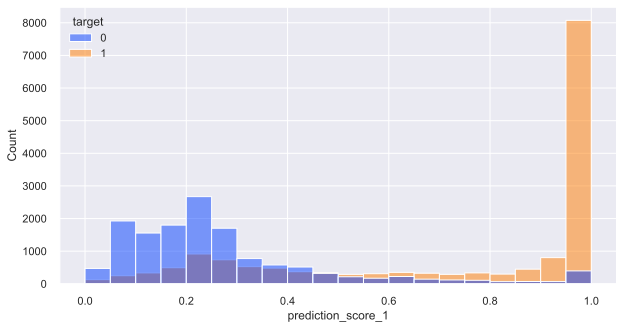

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#################### Histograma Prob
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=a, x="prediction_score_1", hue="target", palette='bright')
#plt.xlim(0, 0.4)
#plt.ylim(0, 50)
plt.show()

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,1.000,1.000,1.000,3000.0,2891.0,109.0,1610.0,3000,96.367,3000.0,2891.0,3000,109.0,10.0,17.957,18.634,0.784,17.173,1.796
1,2,1.000,1.000,1.000,3000.0,2879.0,121.0,1610.0,3000,95.967,6000.0,5770.0,6000,230.0,20.0,35.839,37.267,1.655,34.184,1.792
2,3,0.921,1.000,0.975,3000.0,2796.0,204.0,1610.0,3000,93.200,9000.0,8566.0,9000,434.0,30.0,53.205,55.901,3.122,50.083,1.773
3,4,0.614,0.921,0.770,3000.0,2282.0,718.0,1610.0,3000,76.067,12000.0,10848.0,12000,1152.0,40.0,67.379,74.534,8.288,59.091,1.684
4,5,0.382,0.614,0.481,3000.0,1548.0,1452.0,1610.0,3000,51.600,15000.0,12396.0,15000,2604.0,50.0,76.994,93.168,18.734,58.260,1.540
5,6,0.277,0.382,0.325,3000.0,1173.0,1827.0,1610.0,1100,39.100,18000.0,13569.0,16100,4431.0,60.0,84.280,100.000,31.878,52.402,1.405
6,7,0.218,0.277,0.247,3000.0,833.0,2167.0,1610.0,0,27.767,21000.0,14402.0,16100,6598.0,70.0,89.453,100.000,47.468,41.985,1.278
7,8,0.182,0.218,0.203,3000.0,686.0,2314.0,1610.0,0,22.867,24000.0,15088.0,16100,8912.0,80.0,93.714,100.000,64.115,29.599,1.171
8,9,0.116,0.182,0.147,3000.0,581.0,2419.0,1610.0,0,19.367,27000.0,15669.0,16100,11331.0,90.0,97.323,100.000,81.518,15.805,1.081
9,10,0.000,0.116,0.069,3000.0,431.0,2569.0,1610.0,0,14.367,30000.0,16100.0,16100,13900.0,100.0,100.000,100.000,100.000,0.000,1.000


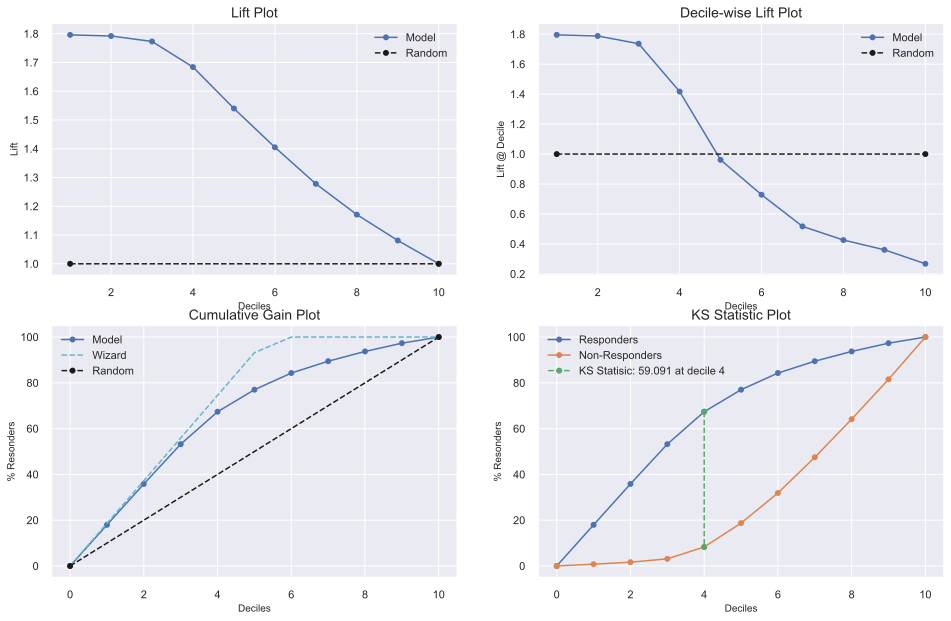

In [43]:
import kds # LIFT PLOT
report_lift = kds.metrics.report(a['target'], a['prediction_score_1'])
report_lift